In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [6]:
Linhas, Colunas = df.shape[0], df.shape[1]
print(f"Linhas: {Linhas}\nColunas: {Colunas}")

Linhas: 133349
Colunas: 11


In [7]:
df.columns

new_columns_name = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

df.rename(columns=new_columns_name, inplace=True)

df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [8]:
df["senioridade"].value_counts()

senioridade
SE    77241
MI    40465
EN    12443
EX     3200
Name: count, dtype: int64

In [9]:
df["contrato"].value_counts()

contrato
FT    132563
CT       394
PT       376
FL        16
Name: count, dtype: int64

In [10]:
df["remoto"].value_counts()

remoto
0      105312
100     27718
50        319
Name: count, dtype: int64

In [11]:
df["tamanho_empresa"].value_counts()

tamanho_empresa
M    129561
L      3574
S       214
Name: count, dtype: int64

In [12]:
mapeamento_senioridade = {
    'SE': 'Sênior',
    'MI': 'Médio',
    'EN': 'Júnior',
    'EX': 'Executivo'
}

df["senioridade"] = df["senioridade"].replace(mapeamento_senioridade)
print("Categorias da coluna 'senioridade' traduzidas:")
print(df["senioridade"].value_counts())

Categorias da coluna 'senioridade' traduzidas:
senioridade
Sênior       77241
Médio        40465
Júnior       12443
Executivo     3200
Name: count, dtype: int64


In [13]:
mapeamento_contrato = {
    'FT': 'Tempo Integral',
    'CT': 'Contrato',
    'PT': 'Meio Período',
    'FL': 'Freelancer'
}
df["contrato"] = df["contrato"].replace(mapeamento_contrato)
print("Categorias da coluna 'contrato' traduzidas:")
print(df["contrato"].value_counts())

Categorias da coluna 'contrato' traduzidas:
contrato
Tempo Integral    132563
Contrato             394
Meio Período         376
Freelancer            16
Name: count, dtype: int64


In [14]:
mapeamento_tamanho_empresa = {
    'M': 'Média',
    'L': 'Grande',
    'S': 'Pequena'
}
df["tamanho_empresa"]  = df["tamanho_empresa"].replace(mapeamento_tamanho_empresa)
print("Categorias da coluna 'tamanho_empresa' traduzidas:")
print(df["tamanho_empresa"].value_counts())

Categorias da coluna 'tamanho_empresa' traduzidas:
tamanho_empresa
Média      129561
Grande       3574
Pequena       214
Name: count, dtype: int64


In [15]:
mapeamento_remoto = {
      0: 'Presencial',
    100: 'Remoto',
    50: 'Híbrido'
}
df["remoto"] = df["remoto"].replace(mapeamento_remoto)
print("Categorias da coluna 'remoto' traduzidas:")
print(df["remoto"].value_counts())

Categorias da coluna 'remoto' traduzidas:
remoto
Presencial    105312
Remoto         27718
Híbrido          319
Name: count, dtype: int64


In [16]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Médio,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Médio,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [17]:
df.describe(include = "object")

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Sênior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Média
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [18]:
df.describe()

,ano,salario,usd
count,133339.000000,1.333490e+05,133349.000000
mean,2024.358770,1.632833e+05,157617.272098
std,0.680627,2.173860e+05,74288.363097
min,2020.000000,1.400000e+04,15000.000000
25%,2024.000000,1.060200e+05,106000.000000
50%,2024.000000,1.470000e+05,146206.000000
75%,2025.000000,1.990000e+05,198000.000000
max,2025.000000,3.040000e+07,800000.000000


In [19]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [20]:
df.isnull().sum()

ano                10
senioridade         0
contrato            0
cargo               0
salario             0
moeda               0
usd                 0
residencia          0
remoto              0
empresa             0
tamanho_empresa     0
dtype: int64

In [21]:
df["ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [22]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Sênior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Média
59692,NaN,Médio,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Média
59710,NaN,Júnior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Média
59759,NaN,Sênior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Média
59789,NaN,Sênior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Média
131000,NaN,Sênior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Média
131006,NaN,Sênior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Média
133054,NaN,Júnior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Médio,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Médio,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [23]:
import numpy as np
# Criando um DataFrame de exemplo com valores ausentes
df_salarios = pd.DataFrame({
    "nome": ["ana", "Bruno", "Carlos", "Daniele",  "Val"], 
    "salario": [4000, np.nan, 5000, np.nan, 100000]
})
# Preenchendo valores ausentes com a média dos salários
df_salarios["salario_media"] = df_salarios["salario"].fillna(df_salarios["salario"].mean().round(2))
# Preenchendo valores ausentes com a mediana dos salários
df_salarios["salario_mediana"] = df_salarios["salario"].fillna(df_salarios["salario"].median().round(2))

df_salarios

,nome,salario,salario_media,salario_mediana
0,ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [24]:
df_temperature = pd.DataFrame({
    "Dia": ["Segunda", "Terça", "Quarta", "Quinta", "Sexta"],
    "Temperaturas" : [30, np.nan, np.nan, 28, 27]  
})

df_temperature["preenchido_ffill"] = df_temperature["Temperaturas"].ffill()
df_temperature

,Dia,Temperaturas,preenchido_ffill
0,Segunda,30.0,30.0
1,Terça,NaN,30.0
2,Quarta,NaN,30.0
3,Quinta,28.0,28.0
4,Sexta,27.0,27.0


In [25]:
df_cidades = pd.DataFrame({
     "nome": ["ana", "Bruno", "Carlos", "Daniele",  "Val"], 
  "cidade": ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]    
})
df_cidades["cidade_preenchida"]  = df_cidades["cidade"].fillna("Não Informado")
df_cidades

,nome,cidade,cidade_preenchida
0,ana,São Paulo,São Paulo
1,Bruno,NaN,Não Informado
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não Informado
4,Val,Belém,Belém


In [26]:
df_limpo = df.dropna()

In [27]:
df_limpo.isnull().sum()

ano                0
senioridade        0
contrato           0
cargo              0
salario            0
moeda              0
usd                0
residencia         0
remoto             0
empresa            0
tamanho_empresa    0
dtype: int64

In [28]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025.0,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025.0,Médio,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025.0,Médio,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025.0,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [29]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [30]:
df_limpo = df_limpo.assign(ano = df_limpo["ano"].astype("int64"))

<Axes: title={'center': 'Distribuição de Senioridade'}, xlabel='senioridade'>

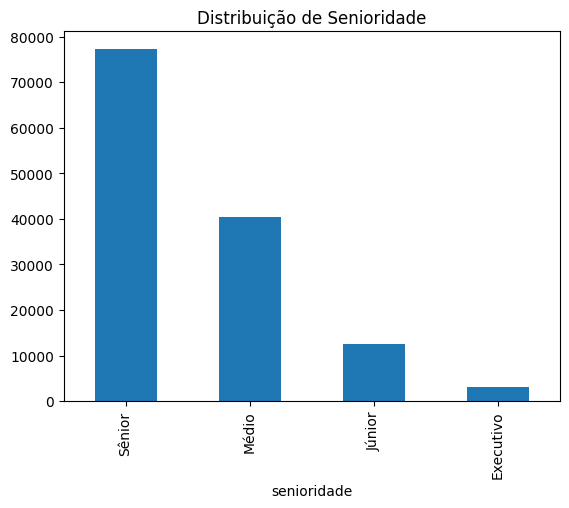

In [31]:
df_limpo["senioridade"].value_counts().plot(kind = "bar", title = "Distribuição de Senioridade")

In [32]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

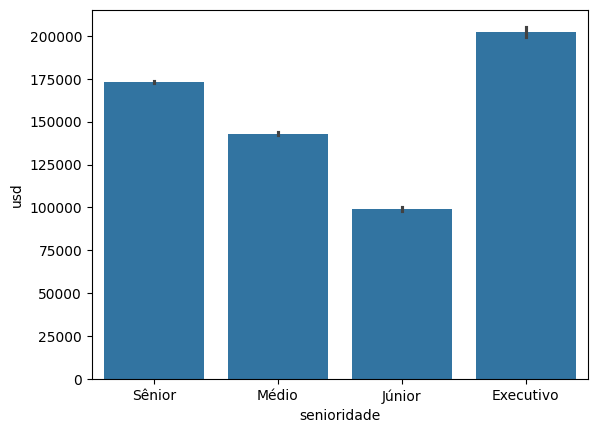

In [33]:
sns.barplot(df_limpo, x="senioridade", y="usd")

In [34]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Salário médio anual [USD]')

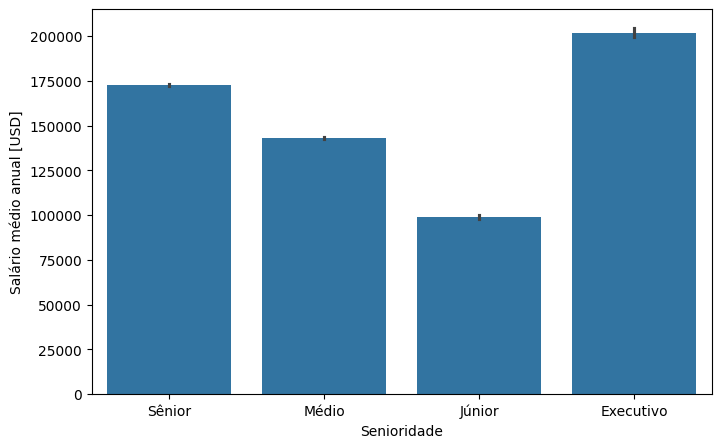

In [35]:
plt.figure(figsize=(8,5))
sns.barplot(df_limpo, x="senioridade", y="usd")
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual [USD]")

In [36]:
df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False)

senioridade
Executivo    202027.667813
Sênior       172850.838301
Médio        143044.845979
Júnior        99034.963267
Name: usd, dtype: float64

In [37]:
ordem = df_limpo.groupby("senioridade")["usd"].mean().sort_values(ascending=False).index

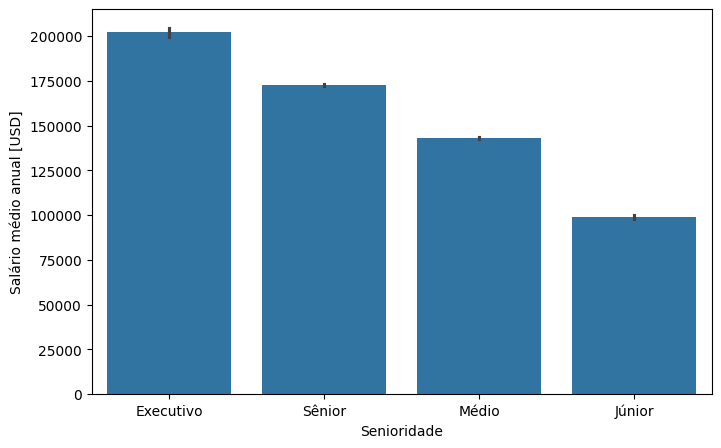

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(df_limpo, x = "senioridade", y = "usd", order = ordem)
plt.xlabel("Senioridade")
plt.ylabel("Salário médio anual [USD]")
plt.show()

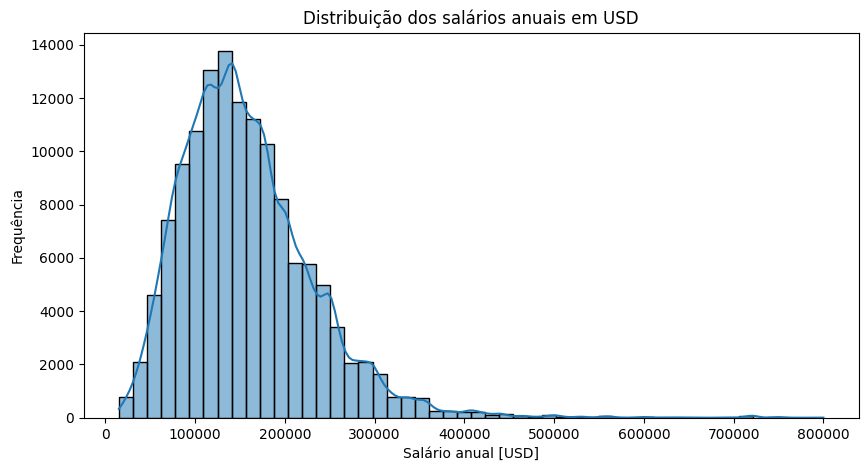

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(df_limpo["usd"], bins = 50, kde = True)
plt.title("Distribuição dos salários anuais em USD")
plt.xlabel("Salário anual [USD]")
plt.ylabel("Frequência")
plt.show()

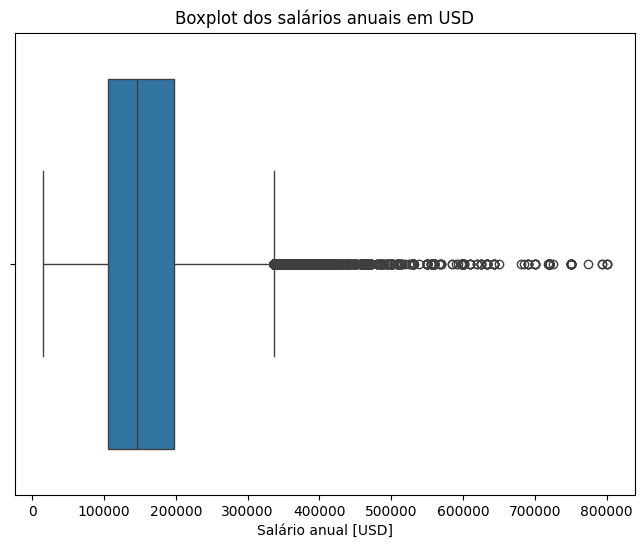

In [40]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df_limpo["usd"])
plt.title("Boxplot dos salários anuais em USD")
plt.xlabel("Salário anual [USD]")
plt.show()

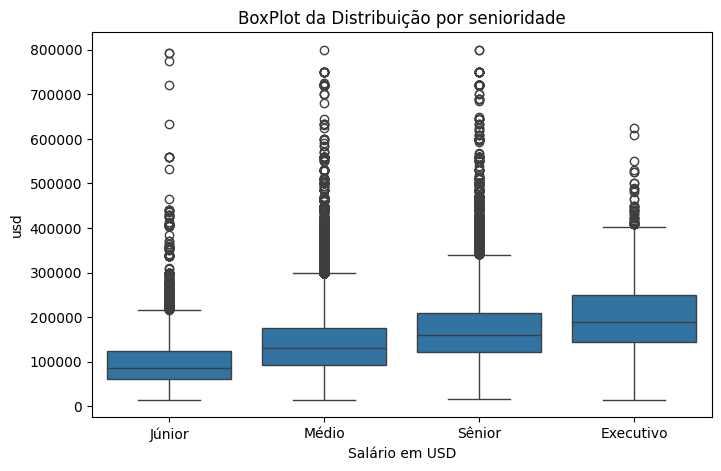

In [41]:
ordem_senioridade = ["Júnior", "Médio", "Sênior", "Executivo"]
plt.figure(figsize=(8,5))
sns.boxplot(x = "senioridade", y = "usd", data = df_limpo, order = ordem_senioridade)
plt.title("BoxPlot da Distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

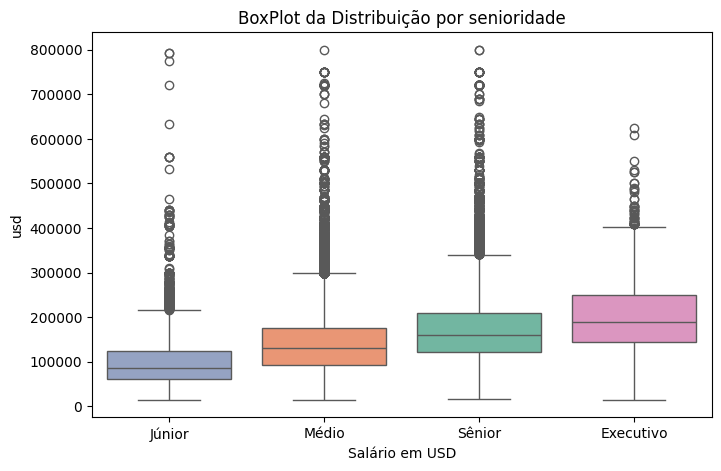

In [42]:
ordem_senioridade = ["Júnior", "Médio", "Sênior", "Executivo"]
plt.figure(figsize=(8,5))
sns.boxplot(x = "senioridade", y = "usd", data = df_limpo, order = ordem_senioridade, palette = "Set2", hue = "senioridade")
plt.title("BoxPlot da Distribuição por senioridade")
plt.xlabel("Salário em USD")
plt.show()

In [43]:
import plotly.express as px

ordem_senioridade = ["Júnior", "Médio", "Sênior", "Executivo"]

# Calcular salário médio por senioridade
df_media = df_limpo.groupby("senioridade")["usd"].mean().reset_index()

fig = px.bar(df_media, 
             x="senioridade", 
             y="usd",
             category_orders={"senioridade": ordem_senioridade},
             color="senioridade",
             title="Distribuição de Salários por Senioridade",
             labels={"senioridade": "Senioridade", "usd": "Salário Médio (USD)"},
             color_discrete_sequence=px.colors.qualitative.Set2,
             height=500, 
             width=800)

fig.update_layout(hovermode="x unified", 
                  xaxis_title="Senioridade",
                  yaxis_title="Salário em USD")
fig.show()

In [44]:
remoto_contagem = df_limpo["remoto"].value_counts().reset_index()
remoto_contagem.columns = ["tipo_trabalho", "quantidade"]
fig = px.pie(
    remoto_contagem,
    names = "tipo_trabalho",
    values = "quantidade",
    title="Proporção dos tipos de Trabalhos",
    hole=0.5
)

fig.update_traces(textinfo = "percent + label")
fig.show()

In [89]:
import pycountry

# Função para converter ISO-2 para ISO-3
def iso2_to_iso3(iso2_code):
    try:
        return pycountry.countries.get(alpha_2=iso2_code).alpha_3
    except:
        return None

# Prepara os dados
df_ds = df_limpo[df_limpo["cargo"] == "Data Scientist"]
media_ds_ps = df_ds.groupby("residencia")["usd"].mean().reset_index()
media_ds_ps["residencia"] = media_ds_ps["residencia"].apply(iso2_to_iso3)
media_ds_ps = media_ds_ps.dropna(subset=["residencia"])
# Cria o mapa
fig = px.choropleth(
    media_ds_ps,
    locations="residencia",
    locationmode="ISO-3",
    color="usd",
    color_continuous_scale="Viridis",  # Mudei a escala
    hover_name="residencia",  # Mostra o nome ao passar o mouse
    hover_data={"usd": True, "residencia": False},  # Customiza o hover
    title="Distribuição de Profissionais por País de Residência",
    labels={"usd": "Salário Médio (USD)"},  # Label melhor
    height=700,
    width=1000
)

# Ajusta o layout
fig.update_geos(
    showcoastlines=True,
    showland=True,
    landcolor="lightgray",
    projection_type="natural earth"  # Projeção mais bonita
)

fig.update_layout(
    margin={"r":0,"t":50,"l":0,"b":0},
    geo=dict(showframe=False, showcoastlines=True)
)

fig.show()

In [104]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Sênior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Média
1,2025,Sênior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Média
2,2025,Médio,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Média
3,2025,Médio,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Média
4,2025,Júnior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Média


In [106]:
df_limpo["ano"]

0         2025
1         2025
2         2025
3         2025
4         2025
          ... 
133344    2020
133345    2021
133346    2020
133347    2020
133348    2021
Name: ano, Length: 133339, dtype: int64